In [1]:
# IMPORTANT! Change the directories here in order to process the following cells
YOUR_OPENMVG_BUILD_DIR = "C:/Users/wangz/Documents/GitHub/build/"
YOUR_OPENMVG_SRC_DIR = "C:/Users/wangz/Documents/GitHub/"
    
SUBMISSION_DIR = "C:/Users/wangz/Documents/GitHub/ECE561MachineVision/FinalProject/"

In [2]:
# Q1 OpenMVG for SfM
# Globla Pipeline Application
import os
import subprocess
import sys

OPENMVG_SFM_BIN = YOUR_OPENMVG_BUILD_DIR + "openMVG/Windows-AMD64-/Release"
CAMERA_SENSOR_WIDTH_DIRECTORY = YOUR_OPENMVG_SRC_DIR + "openMVG/src/software/SfM" + "/../../openMVG/exif/sensor_width_database"
sfm_input_dir = SUBMISSION_DIR + "Q1/Images"
sfm_output_dir = SUBMISSION_DIR + "Q1/Res"
matches_dir = os.path.join(sfm_output_dir, "matches")
reconstruction_dir = os.path.join(sfm_output_dir, "reconstruction_sequential")
camera_file_params = os.path.join(CAMERA_SENSOR_WIDTH_DIRECTORY, "sensor_width_camera_database.txt")

print ("Using input dir  : ", sfm_input_dir)
print ("      output_dir : ", sfm_output_dir)

# Create the ouput/matches folder if not present
if not os.path.exists(sfm_output_dir):
  os.mkdir(sfm_output_dir)
if not os.path.exists(matches_dir):
  os.mkdir(matches_dir)

print ("1. Intrinsics analysis")
pIntrisics = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_SfMInit_ImageListing"),  "-i", sfm_input_dir, "-o", matches_dir, "-d", camera_file_params] )
pIntrisics.wait()

print ("2. Compute features")
pFeatures = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_ComputeFeatures"),  "-i", matches_dir+"/sfm_data.json", "-o", matches_dir, "-m", "SIFT"] )
pFeatures.wait()

print ("3. Compute matches")
pMatches = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_ComputeMatches"),  "-i", matches_dir+"/sfm_data.json", "-o", matches_dir] )
pMatches.wait()

# Create the reconstruction if not present
if not os.path.exists(reconstruction_dir):
    os.mkdir(reconstruction_dir)

print ("4. Do Sequential/Incremental reconstruction")
pRecons = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_IncrementalSfM"),  "-i", matches_dir+"/sfm_data.json", "-m", matches_dir, "-o", reconstruction_dir] )
pRecons.wait()

print ("5. Colorize Structure")
pRecons = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_ComputeSfM_DataColor"),  "-i", reconstruction_dir+"/sfm_data.bin", "-o", os.path.join(reconstruction_dir,"colorized.ply")] )
pRecons.wait()

# optional, compute final valid structure from the known camera poses
print ("6. Structure from Known Poses (robust triangulation)")
pRecons = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_ComputeStructureFromKnownPoses"),  "-i", reconstruction_dir+"/sfm_data.bin", "-m", matches_dir, "-f", os.path.join(matches_dir, "matches.f.bin"), "-o", os.path.join(reconstruction_dir,"robust.bin")] )
pRecons.wait()

pRecons = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_ComputeSfM_DataColor"),  "-i", reconstruction_dir+"/robust.bin", "-o", os.path.join(reconstruction_dir,"robust_colorized.ply")] )
pRecons.wait()

Using input dir  :  C:/Users/wangz/Documents/GitHub/ECE561MachineVision/FinalProject/Q1/Images
      output_dir :  C:/Users/wangz/Documents/GitHub/ECE561MachineVision/FinalProject/Q1/Res
1. Intrinsics analysis
2. Compute features
3. Compute matches
4. Do Sequential/Incremental reconstruction
5. Colorize Structure
6. Structure from Known Poses (robust triangulation)


0

In [3]:
matches_dir = os.path.join(sfm_output_dir, "matches")
reconstruction_dir = os.path.join(sfm_output_dir, "reconstruction_sequential")
camera_file_params = os.path.join(CAMERA_SENSOR_WIDTH_DIRECTORY, "sensor_width_camera_database.txt")

print ("Using input dir  : ", sfm_input_dir)
print ("      output_dir : ", sfm_output_dir)

# Create the ouput/matches folder if not present
if not os.path.exists(sfm_output_dir):
  os.mkdir(sfm_output_dir)
if not os.path.exists(matches_dir):
  os.mkdir(matches_dir)

print ("1. Intrinsics analysis")
pIntrisics = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_SfMInit_ImageListing"),  "-i", sfm_input_dir, "-o", matches_dir, "-d", camera_file_params] )
pIntrisics.wait()

print ("2. Compute features")
pFeatures = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_ComputeFeatures"),  "-i", matches_dir+"/sfm_data.json", "-o", matches_dir, "-m", "SIFT"] )
pFeatures.wait()

print ("3. Compute matches")
pMatches = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_ComputeMatches"),  "-i", matches_dir+"/sfm_data.json", "-o", matches_dir] )
pMatches.wait()

# Create the reconstruction if not present
if not os.path.exists(reconstruction_dir):
    os.mkdir(reconstruction_dir)

print ("4. Do Sequential/Incremental reconstruction")
pRecons = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_IncrementalSfM"),  "-i", matches_dir+"/sfm_data.json", "-m", matches_dir, "-o", reconstruction_dir] )
pRecons.wait()

print ("5. Colorize Structure")
pRecons = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_ComputeSfM_DataColor"),  "-i", reconstruction_dir+"/sfm_data.bin", "-o", os.path.join(reconstruction_dir,"colorized.ply")] )
pRecons.wait()

# optional, compute final valid structure from the known camera poses
print ("6. Structure from Known Poses (robust triangulation)")
pRecons = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_ComputeStructureFromKnownPoses"),  "-i", reconstruction_dir+"/sfm_data.bin", "-m", matches_dir, "-f", os.path.join(matches_dir, "matches.f.bin"), "-o", os.path.join(reconstruction_dir,"robust.bin")] )
pRecons.wait()

pRecons = subprocess.Popen( [os.path.join(OPENMVG_SFM_BIN, "openMVG_main_ComputeSfM_DataColor"),  "-i", reconstruction_dir+"/robust.bin", "-o", os.path.join(reconstruction_dir,"robust_colorized.ply")] )
pRecons.wait()




Using input dir  :  C:/Users/wangz/Documents/GitHub/ECE561MachineVision/FinalProject/Q1/Images
      output_dir :  C:/Users/wangz/Documents/GitHub/ECE561MachineVision/FinalProject/Q1/Res
1. Intrinsics analysis
2. Compute features
3. Compute matches
4. Do Sequential/Incremental reconstruction
5. Colorize Structure
6. Structure from Known Poses (robust triangulation)


0

In [4]:
# Use the testing mode for evaluation (the whole ready-to-go model), since we 
# are not contributing to the model itself
# If user would like to use this acceleration, select the menu option 
# "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and
# click "SAVE"
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision.models.resnet import ResNet, BasicBlock
from torchvision.datasets import MNIST
from torchvision import transforms

from tqdm.autonotebook import tqdm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import inspect
import time
from torch import nn, optim
import torch, os
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Normalize, Resize, CenterCrop, Grayscale
from PIL import Image
import numpy as np

from random import sample
plt.rcParams['figure.figsize'] = [20, 10]

# selected ResNet34 as the model
model = torch.hub.load('pytorch/vision', 'resnet18', pretrained=True)
classes = ["Apple Golden 1", "Apple Golden 2", "Apple Golden 3", "Apple Granny Smith", "Apple Pink Lady"]

def gettrainfiles(): 
    _files, classidx, _filefullpath = [], [], []
    for cls in range(len(classes)):
        classidx += [cls] * len(os.listdir(traindir + '/' + classes[cls]))
        _files += os.listdir(traindir + '/' + classes[cls])
        for f in os.listdir(traindir + '/' + classes[cls]):
            _filefullpath.append(traindir + '/' + classes[cls] + '/' + f)
    return [_files, classidx, _filefullpath]
def gettestfiles(): 
    _files, classidx, _filefullpath = [], [], []
    for cls in range(len(classes)):
        classidx += [cls] * len(os.listdir(testdir + '/' + classes[cls]))
        _files += os.listdir(testdir + '/' + classes[cls])
        for f in os.listdir(testdir + '/' + classes[cls]):
            _filefullpath.append(testdir + '/' + classes[cls] + '/' + f)
    return [_files, classidx, _filefullpath]

root_path = SUBMISSION_DIR + 'Q2/fruits/fruits-360_dataset/fruits-360'

traindir = root_path + '/Training'
testdir = root_path + '/Test'

trainfiles = gettrainfiles()[0]
trainclasses = gettrainfiles()[1]
trainfilefullpaths = gettrainfiles()[2]
testfiles = gettestfiles()[0]
testclasses = gettestfiles()[1]
testfilefullpaths = gettestfiles()[2]

print("Training Data Size: " + str(len(trainfiles)))
print("Testing Data Size: " + str(len(testfiles)))

C:\Users\wangz\.conda\envs\py36cv\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)
Using cache found in C:\Users\wangz/.cache\torch\hub\pytorch_vision_master


Training Data Size: 2413
Testing Data Size: 805


In [5]:
# Q2 (a) recognition experiment:
# here I have not yet started fine-tuning the network 
with open(root_path + '/' + 'imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

model.eval()

test_true, test_pred = [], []
sample_50_image_idx = [x for x in sample(range(len(gettestfiles()[0])),50)]
input_images = sample_50_image_paths = [Image.open(gettestfiles()[2][x]) for x in sample_50_image_idx]
test_true = [classes[testclasses[x]] for x in sample_50_image_idx]
for i in range(len(input_images)):
    preprocess = transforms.Compose([
                  transforms.CenterCrop(224),
                  transforms.ToTensor(),
                  transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                       std=[0.229, 0.224, 0.225]),])
    input_tensor = preprocess(input_images[i])
    input_batch = input_tensor.unsqueeze(0)
    # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)
    _, index = torch.max(output, 1)
    # The output has unnormalized scores. To get probabilities, run a 
    # softmax on it (to normalize the scores to probability).
    percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
    pred_label_i = labels[index[0]]
    test_pred.append(pred_label_i)

print("Recognition Experiment Using ImageNet pre-trained model on the Fruit360 Data:")
print('\t', "True Fruit Class", '\t', "Predicted ImageNet Class")
print('\t', "################", '\t', "########################\n")

for i in range(len(sample_50_image_idx)):
    print('\t', test_true[i], '\t\t', test_pred[i])

Recognition Experiment Using ImageNet pre-trained model on the Fruit360 Data:
	 True Fruit Class 	 Predicted ImageNet Class
	 ################ 	 ########################

	 Apple Granny Smith 		 Granny Smith
	 Apple Golden 3 		 Granny Smith
	 Apple Golden 3 		 Granny Smith
	 Apple Golden 1 		 lemon
	 Apple Pink Lady 		 orange
	 Apple Granny Smith 		 Granny Smith
	 Apple Pink Lady 		 Granny Smith
	 Apple Pink Lady 		 orange
	 Apple Granny Smith 		 Granny Smith
	 Apple Golden 1 		 lemon
	 Apple Golden 2 		 Granny Smith
	 Apple Granny Smith 		 Granny Smith
	 Apple Golden 1 		 custard apple
	 Apple Pink Lady 		 pomegranate
	 Apple Golden 3 		 Granny Smith
	 Apple Golden 3 		 Granny Smith
	 Apple Golden 1 		 lemon
	 Apple Pink Lady 		 Granny Smith
	 Apple Golden 3 		 Granny Smith
	 Apple Granny Smith 		 Granny Smith
	 Apple Pink Lady 		 orange
	 Apple Golden 2 		 Granny Smith
	 Apple Golden 1 		 lemon
	 Apple Golden 2 		 Granny Smith
	 Apple Golden 1 		 lemon
	 Apple Golden 2 		 Granny Smit

In [6]:
# Q2 Supportive Functional Utilities
class FiveClassFruit(Dataset):
    def __init__(self, filelist, classlist, fullfilepath, transform=None):
        self.filelist = filelist
        self.classlist = classlist
        self.fullfilepath = fullfilepath
        self.transform = transform
    
    def __len__(self):
        assert len(self.filelist) == len(self.classlist) == len(self.fullfilepath)
        return len(self.filelist)
    
    def __getitem__(self, idx):
        img_name = self.filelist[idx]            
        fullname = self.fullfilepath[idx]
        cls = self.classlist[idx]
        image = Image.open(fullname)
        if self.transform:
            image = self.transform(image)
        return [image, cls]

def get_data_loaders(train_batch_size=8, val_batch_size=2):    
    data_transform = Compose([Resize((224,224)),
                              CenterCrop(224),
                              ToTensor(), 
                              Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])])

    train_loader = DataLoader(FiveClassFruit(trainfiles, 
                                             trainclasses,
                                             trainfilefullpaths, 
                                             transform=data_transform),
                              batch_size=train_batch_size, shuffle=True)

    val_loader = DataLoader(FiveClassFruit(testfiles, 
                                           testclasses,
                                           testfilefullpaths, 
                                           transform=data_transform),
                            batch_size=val_batch_size, shuffle=False)
    # use the train dataset for both train and validation (no labels on testset)
    return train_loader, val_loader

def calculate_metric(metric_fn, true_y, pred_y):
    # multi class problems need to have averaging method
    if "average" in inspect.getfullargspec(metric_fn).args:
        return metric_fn(true_y, pred_y, average="macro")
    else:
        return metric_fn(true_y, pred_y)
    
def print_scores(p, r, f1, a, batch_size):
    for name, scores in zip(("precision", "recall", "F1", "accuracy"), (p, r, f1, a)):
        print(f"\t{name.rjust(14, ' ')}: {sum(scores)/batch_size:.4f}")

def train_and_val(model):
    losses.append([]) # training losses
    losses.append([]) # validation losses
    
    batches = len(train_loader)
    val_batches = len(val_loader)

    # loop for every epoch (training + evaluation)
    for epoch in range(epochs):
        total_loss = 0

        # progress bar
        progress = tqdm(enumerate(train_loader), desc="Loss: ", total=batches)

        # ----------------- TRAINING  -------------------- 
        # set model to training
        model.train()
        for i, data in progress:
            X, y = data[0].to(device), data[1].to(device)

            # training step for single batch
            model.zero_grad()
            outputs = model(X)
            loss = loss_function(outputs, y)
            loss.backward()
            optimizer.step()
            losses[0].append(total_loss/(i+1)) # for plotting learning curve

            # getting training quality data
            current_loss = loss.item()
            total_loss += current_loss

            # updating progress bar
            progress.set_description("Loss: {:.4f}".format(total_loss/(i+1)))

        # releasing unceseccary memory in GPU
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        # ----------------- VALIDATION  ----------------- 
        val_losses = 0
        precision, recall, f1, accuracy = [], [], [], []
        true_cls, pred_cls = [], []
        # set model to evaluating (testing)
        model.eval()
        with torch.no_grad():
            for i, data in enumerate(val_loader):
                X, y = data[0].to(device), data[1].to(device)
                # Get's the prediction (outputs) from the network
                outputs = model(X)
                losses[1].append(val_losses/(i+1)) # for plotting learning curve

                val_losses += loss_function(outputs, y)

                predicted_classes = torch.max(outputs, 1)[1] # get class from network's prediction
                true_cls.extend(y.cpu())
                pred_cls.extend(predicted_classes.cpu())

                # calculate P/R/F1/A metrics for batch
                for acc, metric in zip((precision, recall, f1, accuracy), 
                                       (precision_score, recall_score, f1_score, accuracy_score)):
                    acc.append(calculate_metric(metric, 
                                                y.cpu(), predicted_classes.cpu()))
            print(confusion_matrix(true_cls, pred_cls, labels=[0,1,2,3,4]))
            print(f"Epoch {epoch+1}/{epochs}, training loss: {total_loss/batches}, validation loss: {val_losses/val_batches}")
            print_scores(precision, recall, f1, accuracy, val_batches)
    plt.plot(np.array(losses[0]) , 'r', label="train")
    plt.plot(np.array(losses[1]) , 'b', label="validation")
    plt.legend(loc="upper right")
    print(f"Training time: {time.time()-start_ts}s")

Using cache found in C:\Users\wangz/.cache\torch\hub\pytorch_vision_master


Pretrained ResNet18 with fine-tuning the fully-connected layer only:
Batch Norms are all activated as pretraied parameters:


C:\Users\wangz\.conda\envs\py36cv\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\wangz\.conda\envs\py36cv\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[[164   0   0   0   0]
 [  0 164   0   0   0]
 [  0   2 159   0   0]
 [  0   0   3 161   0]
 [  0   5   0   0 147]]
Epoch 1/3, training loss: 0.7725713872595837, validation loss: 0.28993508219718933
	     precision: 0.9542
	        recall: 0.9483
	            F1: 0.9510
	      accuracy: 0.9877



[[164   0   0   0   0]
 [  0 164   0   0   0]
 [  0   0 161   0   0]
 [  0   0   9 155   0]
 [  0   0   0   0 152]]
Epoch 2/3, training loss: 0.19264166410032071, validation loss: 0.14085300266742706
	     precision: 0.9641
	        recall: 0.9588
	            F1: 0.9612
	      accuracy: 0.9890



[[164   0   0   0   0]
 [  0 164   0   0   0]
 [  0   0 161   0   0]
 [  0   0   5 159   0]
 [  0   0   0   0 152]]
Epoch 3/3, training loss: 0.10974306770061192, validation loss: 0.09650775045156479
	     precision: 0.9641
	        recall: 0.9611
	            F1: 0.9625
	      accuracy: 0.9939
Training time: 49.9143590927124s


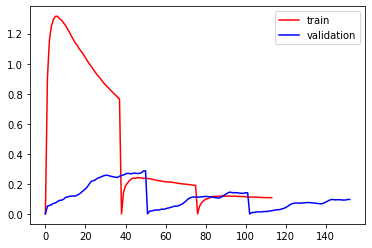

In [7]:
# Q2: Use ResNet18 for fine-tuning fully connected layer to achieve the best results
model = torch.hub.load('pytorch/vision', 'resnet18', pretrained=True)
# Fine-tuning: First modify the model configurations
# set all weights to be fixed: not back-propogating gradients
# set the number of classes as 5 (required by the project)
# replace the last layer with our custmozied linear layer with 5 out features (5 classes)
class_num = len(classes)
channel_in = model.fc.in_features

model.fc = nn.Linear(in_features=channel_in, out_features=class_num)
for params in model.parameters():
    params.requires_grad = False

# set the fully connected layer to be trainable: require back-propogation of gradients
for params in model.fc.parameters():
    params.requires_grad = True

epochs = 3
train_loader, val_loader = get_data_loaders(64,16)# put your data loader here, play with batch size to satisfy cuda
loss_function = nn.CrossEntropyLoss() # your loss function, cross entropy works well for multi-class problems

# optimizer, try Adam this time to have a taste
# optimize the full connection layer only, magic numbers from online resource
optimizer = optim.Adam(model.fc.parameters(), lr=0.001, betas=(0.9, 0.999))

os.environ['CUDA_VISIBLE_DEVICES']='0'

start_ts = time.time()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
use_cuda = True

torch.cuda.empty_cache()
model.cuda()

losses = []

print("Pretrained ResNet18 with fine-tuning the fully-connected layer only:")
print("Batch Norms are all activated as pretraied parameters:")

train_and_val(model)

Using cache found in C:\Users\wangz/.cache\torch\hub\pytorch_vision_master


Pretrained ResNet18 with fine-tuning the fully-connected layer only:
Last layer Batch Norm Children are all deactivated (replaced by Identitiy layer):



C:\Users\wangz\.conda\envs\py36cv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wangz\.conda\envs\py36cv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[164   0   0   0   0]
 [164   0   0   0   0]
 [160   1   0   0   0]
 [112   2   0  50   0]
 [136   0   0   0  16]]
Epoch 1/10, training loss: 1.5623815561595715, validation loss: 1.523653268814087
	     precision: 0.3342
	        recall: 0.2428
	            F1: 0.2532
	      accuracy: 0.2819



[[164   0   0   0   0]
 [143  21   0   0   0]
 [ 91  14  52   4   0]
 [  1   0   0 163   0]
 [ 69   0   0   0  83]]
Epoch 2/10, training loss: 1.4761223573433726, validation loss: 1.4446851015090942
	     precision: 0.6154
	        recall: 0.4874
	            F1: 0.5063
	      accuracy: 0.6054



[[164   0   0   0   0]
 [ 74  90   0   0   0]
 [ 26  17 118   0   0]
 [  0   0   0 164   0]
 [ 23   0   0   0 129]]
Epoch 3/10, training loss: 1.3970452390219037, validation loss: 1.3737537860870361
	     precision: 0.8064
	        recall: 0.7322
	            F1: 0.7524
	      accuracy: 0.8284



[[164   0   0   0   0]
 [ 54 110   0   0   0]
 [ 21   9 112  19   0]
 [  0   0   0 164   0]
 [ 11   0   0   0 141]]
Epoch 4/10, training loss: 1.3248711291112398, validation loss: 1.3063929080963135
	     precision: 0.7990
	        recall: 0.7489
	            F1: 0.7647
	      accuracy: 0.8603



[[164   0   0   0   0]
 [ 20 144   0   0   0]
 [ 10   4 123  24   0]
 [  0   0   0 164   0]
 [  8   0   0   0 144]]
Epoch 5/10, training loss: 1.2559526468578137, validation loss: 1.24497389793396
	     precision: 0.8199
	        recall: 0.7921
	            F1: 0.8028
	      accuracy: 0.9191



[[164   0   0   0   0]
 [  2 162   0   0   0]
 [  6   6 143   6   0]
 [  0   0   0 164   0]
 [  4   0   0   0 148]]
Epoch 6/10, training loss: 1.1979797733457465, validation loss: 1.1877758502960205
	     precision: 0.8954
	        recall: 0.8836
	            F1: 0.8886
	      accuracy: 0.9706



[[164   0   0   0   0]
 [  9 155   0   0   0]
 [  8   5 137  11   0]
 [  0   0   0 164   0]
 [  0   0   0   0 152]]
Epoch 7/10, training loss: 1.1351175841532255, validation loss: 1.1322625875473022
	     precision: 0.8807
	        recall: 0.8655
	            F1: 0.8716
	      accuracy: 0.9596



[[164   0   0   0   0]
 [  1 163   0   0   0]
 [  6   7 144   4   0]
 [  0   0   0 164   0]
 [  0   0   0   0 152]]
Epoch 8/10, training loss: 1.0814139152828015, validation loss: 1.082474946975708
	     precision: 0.9248
	        recall: 0.9165
	            F1: 0.9200
	      accuracy: 0.9779



[[164   0   0   0   0]
 [  1 163   0   0   0]
 [  6   2 152   1   0]
 [  0   0   0 164   0]
 [  0   0   0   0 152]]
Epoch 9/10, training loss: 1.0338085654534792, validation loss: 1.0357661247253418
	     precision: 0.9608
	        recall: 0.9551
	            F1: 0.9575
	      accuracy: 0.9877



[[164   0   0   0   0]
 [  0 164   0   0   0]
 [  3   6 151   1   0]
 [  0   0   0 164   0]
 [  0   0   0   0 152]]
Epoch 10/10, training loss: 0.986623498954271, validation loss: 0.9932771921157837
	     precision: 0.9641
	        recall: 0.9598
	            F1: 0.9616
	      accuracy: 0.9877
Training time: 165.98052406311035s


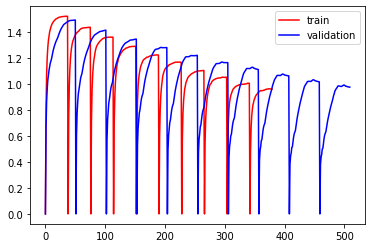

In [8]:
# Q2: Use ResNet18 for testing Batch Normalization
# ResNet pretrained models already uses BatchNorm at each layer
# At this experiment, deactivate some BatchNorm children layers to see the performance difference
# Still need to modify the fc layer because we are dealing with a five-class classification problem
model = torch.hub.load('pytorch/vision', 'resnet18', pretrained=True)
# set the number of classes as 5 (required by the project)
# replace the last layer with our custmozied linear layer with 5 out features (5 classes)
class_num = len(classes)
channel_in = model.fc.in_features
model.fc = nn.Linear(in_features=channel_in, out_features=class_num)

# Deactivating the BatchNorms of the last layer
model.layer4[0].bn1 = nn.Identity()
model.layer4[0].bn2 = nn.Identity()
model.layer4[1].bn1 = nn.Identity()
model.layer4[1].bn2 = nn.Identity()


# Fine-tuning: First modify the model configurations
# set all weights to be fixed: not back-propogating gradients
for params in model.parameters():
    params.requires_grad = False

# set the fully connected layer to be trainable: require back-propogation of gradients
for params in model.fc.parameters():
    params.requires_grad = True



epochs = 10
train_loader, val_loader = get_data_loaders(64,16)# put your data loader here, play with batch size to satisfy cuda
loss_function = nn.CrossEntropyLoss() # your loss function, cross entropy works well for multi-class problems

# optimizer, try Adam this time to have a taste
# optimize the full connection layer only, magic numbers from online resource
optimizer = optim.Adam(model.fc.parameters(), lr=0.001, betas=(0.9, 0.999))

os.environ['CUDA_VISIBLE_DEVICES']='0'

start_ts = time.time()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
use_cuda = True

torch.cuda.empty_cache()
model.cuda()

losses = []

print("Pretrained ResNet18 with fine-tuning the fully-connected layer only:")
print("Last layer Batch Norm Children are all deactivated (replaced by Identitiy layer):\n")

train_and_val(model)

Using cache found in C:\Users\wangz/.cache\torch\hub\pytorch_vision_master


Pretrained Alexnet with fine-tuning the last linear layer only:
Alexnet With Dropout Fully Activated:




[[164   0   0   0   0]
 [  0   7 157   0   0]
 [  0   0 161   0   0]
 [  0   0  40 124   0]
 [  0   0   0   0 152]]
Epoch 1/3, training loss: 57.90942322737292, validation loss: 14.384298324584961
	     precision: 0.8059
	        recall: 0.7418
	            F1: 0.7485
	      accuracy: 0.7586



[[164   0   0   0   0]
 [  0 157   7   0   0]
 [  0   0 161   0   0]
 [  0   0  16 148   0]
 [  0   0   0   0 152]]
Epoch 2/3, training loss: 2.215481696944488, validation loss: 0.21895712614059448
	     precision: 0.9412
	        recall: 0.9271
	            F1: 0.9327
	      accuracy: 0.9718



[[164   0   0   0   0]
 [  0 124  40   0   0]
 [  0   0 161   0   0]
 [  0   0  24 140   0]
 [  0   0   0   0 152]]
Epoch 3/3, training loss: 1.1168175786733627, validation loss: 1.3718103170394897
	     precision: 0.9107
	        recall: 0.8719
	            F1: 0.8819
	      accuracy: 0.9216
Training time: 27.909306049346924s


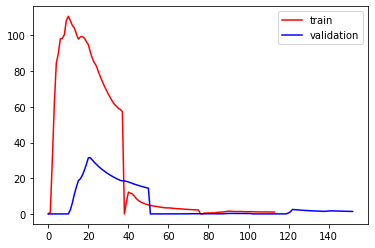

In [9]:
# Q2:Use Alexnet for testing Dropout Regularization
# Alexnet already uses 0.5 in three dropout layers
# Modify the classfier[6] of Alexnet to fine tune
model = torch.hub.load('pytorch/vision', 'alexnet', pretrained=True)
model.classifier[6] = nn.Linear(4096, len(classes))

# set all weights to be fixed: not back-propogating gradients
for params in model.parameters():
    params.requires_grad = False

# set the classifier[6] layer to be trainable: require back-propogation of gradients
for params in model.classifier[6].parameters():
    params.requires_grad = True

epochs = 3
train_loader, val_loader = get_data_loaders(64,16)# put your data loader here, play with batch size to satisfy cuda
loss_function = nn.CrossEntropyLoss() # your loss function, cross entropy works well for multi-class problems

# construct the stochastic gradient descent opimizer 
# and filter-out those parameters requiring gradient inputs (previsou layers)
optimizer = torch.optim.SGD(params=filter(lambda p: p.requires_grad, model.parameters()), lr=0.1)

os.environ['CUDA_VISIBLE_DEVICES']='0'

start_ts = time.time()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
use_cuda = True

torch.cuda.empty_cache()
model.cuda()

losses = []

print("Pretrained Alexnet with fine-tuning the last linear layer only:")
print("Alexnet With Dropout Fully Activated:\n")
train_and_val(model)

Using cache found in C:\Users\wangz/.cache\torch\hub\pytorch_vision_master


Pretrained Alexnet with fine-tuning the last linear layer only:
Alexnet With Dropout Fully Deactivated (replaced by Identity layers):




[[164   0   0   0   0]
 [  0 163   1   0   0]
 [  0  15 146   0   0]
 [  0   0  24 140   0]
 [  0   0   0   0 152]]
Epoch 1/3, training loss: 45.07339855083946, validation loss: 0.4488566815853119
	     precision: 0.9216
	        recall: 0.8971
	            F1: 0.9050
	      accuracy: 0.9510



[[164   0   0   0   0]
 [  0 162   2   0   0]
 [  0  17 144   0   0]
 [  0   0   3 161   0]
 [  0   0   0   0 152]]
Epoch 2/3, training loss: 3.776072288814344, validation loss: 0.31963109970092773
	     precision: 0.9314
	        recall: 0.9179
	            F1: 0.9218
	      accuracy: 0.9730



[[164   0   0   0   0]
 [  0 162   2   0   0]
 [  0  17 144   0   0]
 [  0   0   3 161   0]
 [  0   0   0   0 152]]
Epoch 3/3, training loss: 5.133563335173101e-06, validation loss: 0.31794455647468567
	     precision: 0.9314
	        recall: 0.9179
	            F1: 0.9218
	      accuracy: 0.9730
Training time: 27.433611392974854s


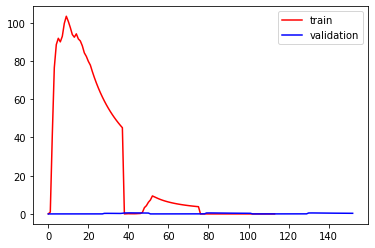

In [10]:
# Q2: Use Alexnet for testing Dropout Regularization
# Deactivating Dropout Layers by substituion of Identify layers
# Classifier[6] still needs to be modified because the number of classes has changed to 5
model = torch.hub.load('pytorch/vision', 'alexnet', pretrained=True)
model.classifier[6] = nn.Linear(4096, len(classes))

# deactivate the Dropout to see if there is difference or not
model.classifier[0] = nn.Identity()
model.classifier[3] = nn.Identity()

# set all weights to be fixed: not back-propogating gradients
for params in model.parameters():
    params.requires_grad = False

# set the classifier[6] layer to be trainable: require back-propogation of gradients
for params in model.classifier[6].parameters():
    params.requires_grad = True

epochs = 3
train_loader, val_loader = get_data_loaders(64,16)# put your data loader here, play with batch size to satisfy cuda
loss_function = nn.CrossEntropyLoss() # your loss function, cross entropy works well for multi-class problems

# construct the stochastic gradient descent opimizer 
# and filter-out those parameters requiring gradient inputs (previsou layers)
optimizer = torch.optim.SGD(params=filter(lambda p: p.requires_grad, model.parameters()), lr=0.1)

os.environ['CUDA_VISIBLE_DEVICES']='0'

start_ts = time.time()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
use_cuda = True

torch.cuda.empty_cache()
model.cuda()

losses = []

print("Pretrained Alexnet with fine-tuning the last linear layer only:")
print("Alexnet With Dropout Fully Deactivated (replaced by Identity layers):\n")
train_and_val(model)

['C:/Users/wangz/Documents/GitHub/ECE561MachineVision/FinalProject/Q3/checkerboards\\IMG_20191021_154556.jpg', 'C:/Users/wangz/Documents/GitHub/ECE561MachineVision/FinalProject/Q3/checkerboards\\IMG_20191021_154728.jpg', 'C:/Users/wangz/Documents/GitHub/ECE561MachineVision/FinalProject/Q3/checkerboards\\IMG_20191021_154731.jpg', 'C:/Users/wangz/Documents/GitHub/ECE561MachineVision/FinalProject/Q3/checkerboards\\IMG_20191021_154735.jpg', 'C:/Users/wangz/Documents/GitHub/ECE561MachineVision/FinalProject/Q3/checkerboards\\IMG_20191021_154737.jpg']


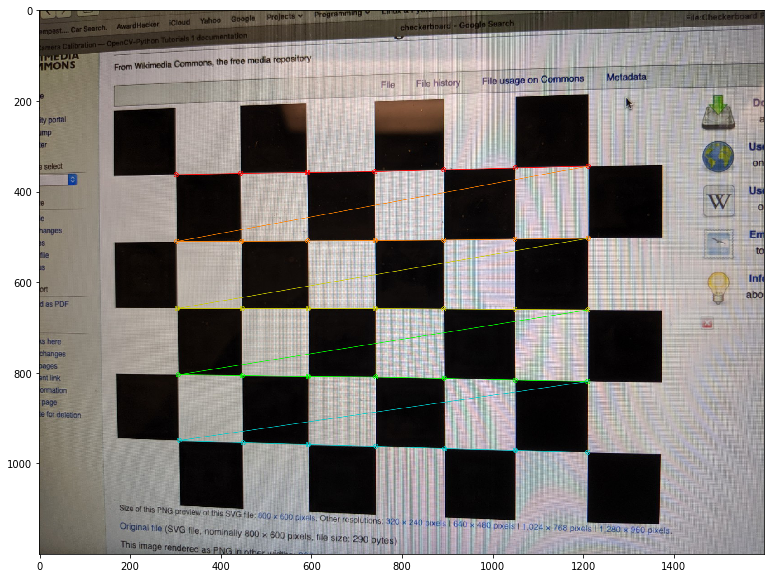

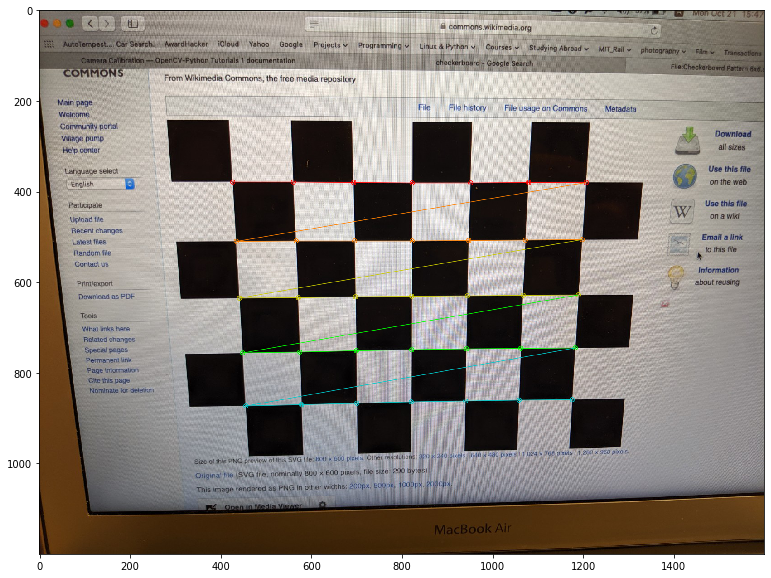

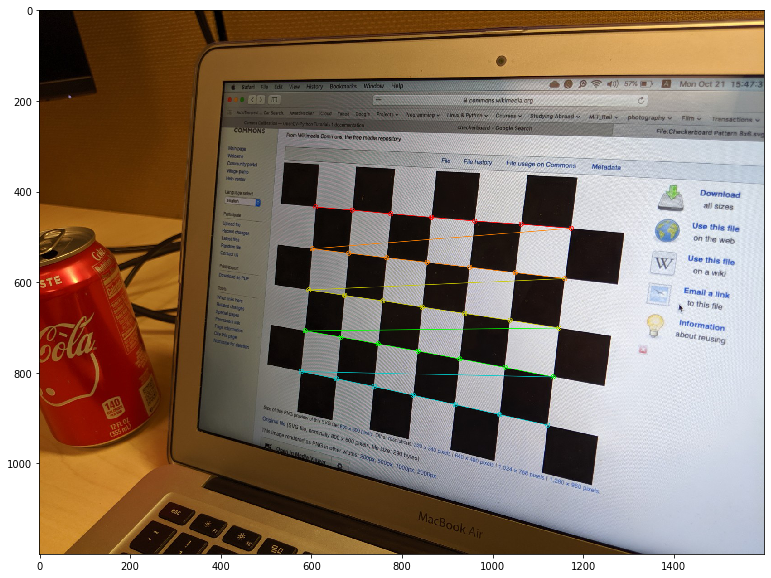

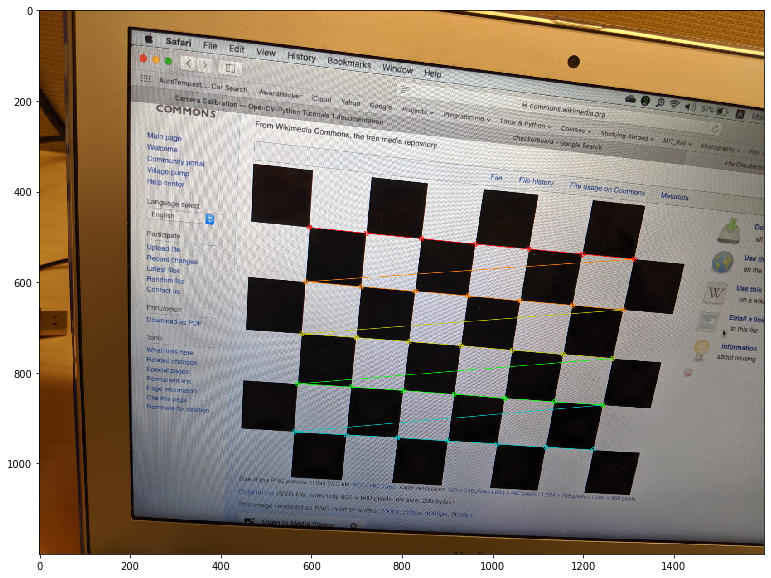

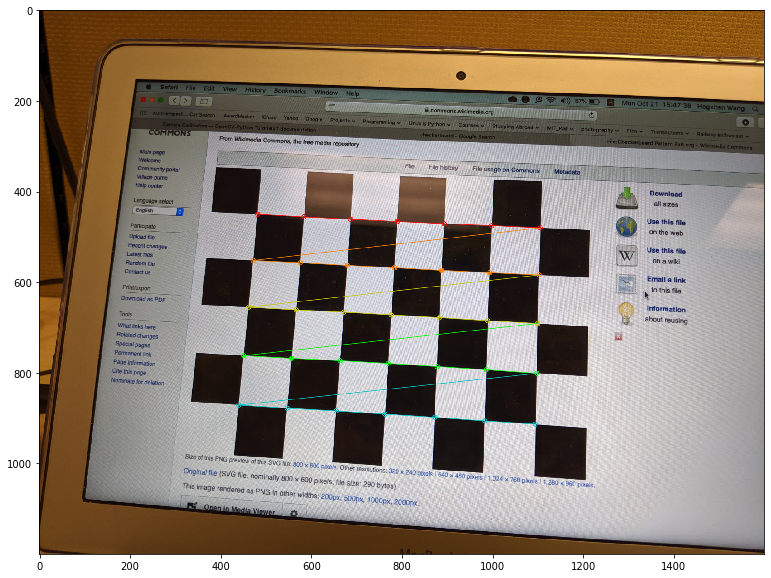

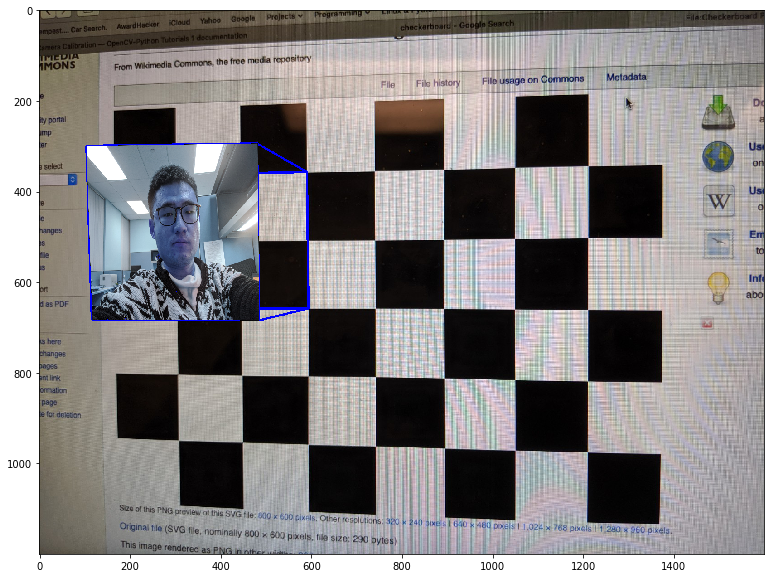

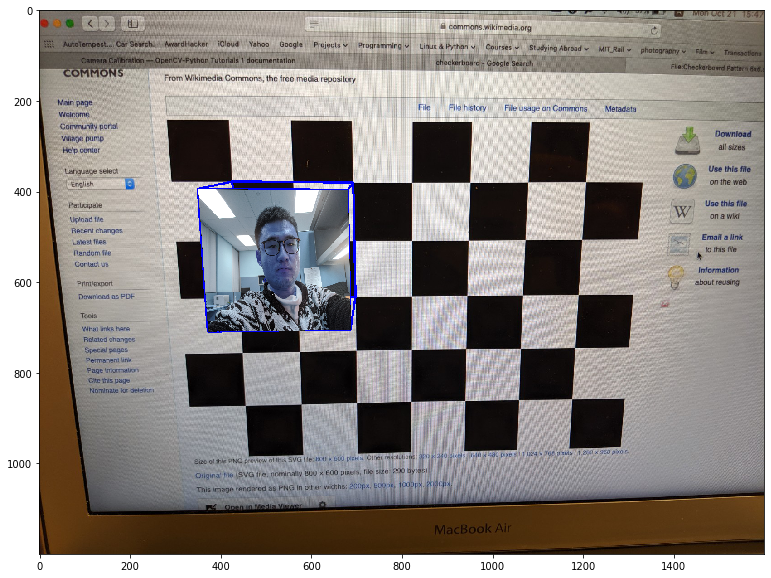

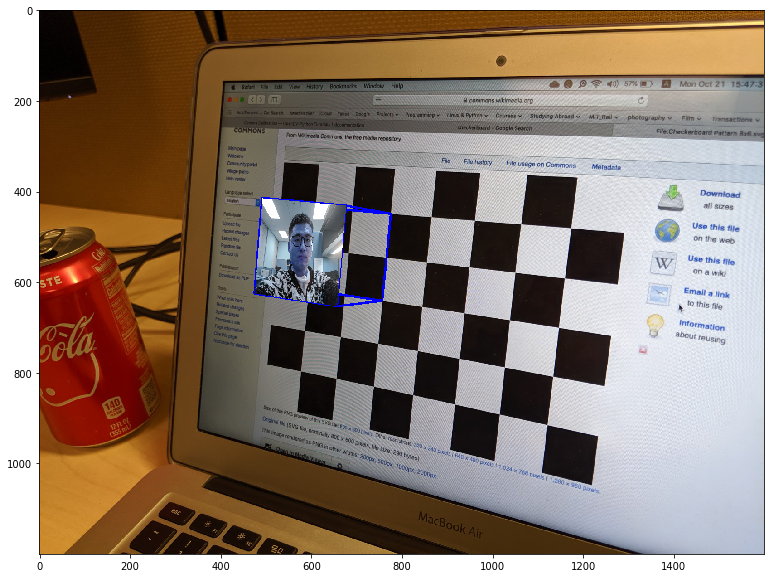

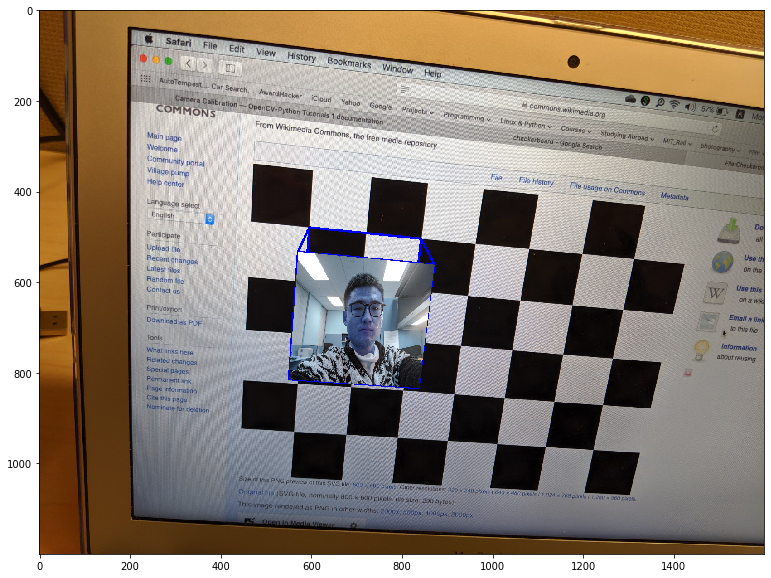

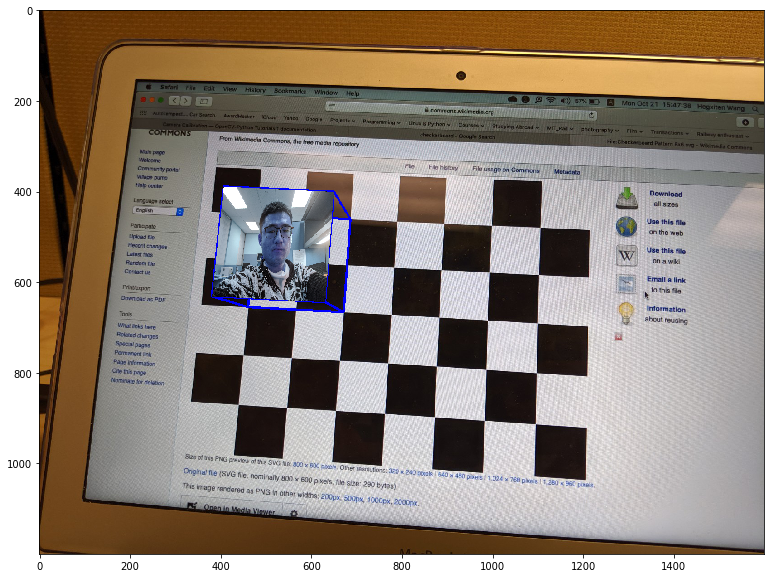

In [11]:
# Q3: Augmented Reality
# Q3: Augmented Reality
# Calibrate the Camera using the OpenCV calibrateCamera tool
%matplotlib inline
import numpy as np
import cv2 as cv
import glob
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

CHECKERBOARDS_DIR = SUBMISSION_DIR + "Q3/checkerboards"
SELFFIE_DIR = SUBMISSION_DIR + "Q3/selffie"
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((5*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:5].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob(CHECKERBOARDS_DIR+'/*.jpg')
print(images)
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,5), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,5), corners2, ret)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.show()
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

axis = np.float32([[0,0,0], [0,2,0], [2,2,0], [2,0,0],[0,0,-2],[0,2,-2],[2,2,-2],[2,0,-2]])

# Draw the wire frame with corresponding points:
def draw(img, corners, imgpts, attach=False):
    imgpts = np.int32(imgpts).reshape(-1,2)
    # draw pillars in blue color
    for i,j in zip([0,1,2,3],[4,5,6,7]):
        img = cv.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    for i,j in zip([0,2,4,6],[1,3,5,7]):
        img = cv.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    for i,j in zip([0,1,4,5],[3,2,7,6]):
        img = cv.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    return img

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, (7,5), None)
    if ret == True:
        corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        # Find the rotation and translation vectors.
        ret, rvecs, tvecs = cv.solvePnP(objp, corners2, mtx, dist)
        # project 3D points to image plane
        imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, mtx, dist)
        img = draw(img, corners2, imgpts)

        selffie_img = cv.imread(SELFFIE_DIR + "/selffie.jpg")
        selffie_img = cv.resize(selffie_img, (1000,1000))
        selffie_img = cv.cvtColor(selffie_img , cv.COLOR_RGB2BGR)
        back_img = img
        rows , cols ,ch = selffie_img.shape
        back_rows , back_cols ,back_ch = back_img.shape
        # persective transform according to the projected imgpts
        # I selected the top facet as imgpts[4:]
        pts1 = np.float32([[0,0],[rows,0],[rows,cols],[0,cols]])
        pts2 = np.float32([imgpts[4:][3], imgpts[4:][0], imgpts[4:][1], imgpts[4:][2]])
        M = cv.getPerspectiveTransform(pts1,pts2)
        dst = cv.warpPerspective(selffie_img,M,(back_cols,back_rows))
        # convert my selffie to gray in order to fit mask
        # use a binary mask to achieve a bitwise-add
        gray_dst = cv.cvtColor(dst , cv.COLOR_RGB2GRAY)
        ret,mask = cv.threshold(gray_dst,1,255,cv.THRESH_BINARY)
        mask_inv = cv.bitwise_not(mask)
        # attach the selffie using bitwise_and
        img_bg = cv.bitwise_and(back_img, back_img, mask = mask_inv)
        res = cv.add(img_bg, dst)
        plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
        plt.show()


In [12]:
%matplotlib inline
import torch
from torch.autograd import Variable
import torch.nn as nn
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, Dataset
from tqdm.autonotebook import tqdm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import os
import time

plt.rcParams['figure.figsize'] = [20, 10]

SLTM_DATA_DIR = SUBMISSION_DIR + "Q4"

data = []

df1 = pd.read_csv(SLTM_DATA_DIR + '/data.txt', skiprows=18, engine="python", names=['Time', 'CH1', 'CH2'], sep='\t')

def calculate_metric(metric_fn, true_y, pred_y):
    # multi class problems need to have averaging method
    if "average" in inspect.getfullargspec(metric_fn).args:
        return metric_fn(true_y, pred_y, average="macro")
    else:
        return metric_fn(true_y, pred_y)
    
def print_scores(p, r, f1, a, batch_size):
    for name, scores in zip(("precision", "recall", "F1", "accuracy"), (p, r, f1, a)):
        print(f"\t{name.rjust(14, ' ')}: {sum(scores)/batch_size:.4f}")

In [13]:
datas = df1.values[:,-1]
max_value = np.max(datas)
min_value = np.min(datas)
scalar = max_value - min_value
datas = list(map(lambda x: x / scalar, datas))

def creat_dataset(dataset,look_back):
    data_x = []
    data_y = []
    for i in range(len(dataset)-look_back):
        data_x.append(dataset[i:i+look_back])
        data_y.append(dataset[i+look_back])
    return np.asarray(data_x), np.asarray(data_y)

In [14]:
dataX, dataY = creat_dataset(datas,look_back = 150)

train_size = int(len(dataX)*0.7)
test_size = int(len(dataX)*0.3)

x_train = dataX[:train_size] #training data
y_train = dataY[:train_size] #target value

x_test = dataX[-test_size:] 
y_test = dataY[-test_size:] 

x_train = x_train.reshape(-1, 1, 150) #resize to fit designed LSTM dimentions
y_train = y_train.reshape(-1, 1, 1)   #resize to fit designed LSTM dimentions
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

x_test = x_test.reshape(-1, 1, 150) 
y_test = y_test.reshape(-1, 1, 1) 
x_test = torch.from_numpy(x_test)
y_test = torch.from_numpy(y_test)


In [15]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        self.lstm = nn.LSTM(150,6,2) #input as 150 features (lookbacks), 6 hidden layers，2 tandem LSTM
        self.out = nn.Linear(6,1)    #Linear output from the 6 hidden layers for the prediction (1-d value)
    def forward(self,x):
        x1,_ = self.lstm(x)
        a,b,c = x1.shape
        #Linear input is 2-d，resize the LSTM 3-d output to fit the linear，
        out = self.out(x1.view(-1,c)) 
        #because of the recurrency, resize the output to 3-d to pass for the next use
        out1 = out.view(a,b,-1) 
        return out1

rnn = RNN()

In [16]:
class VibrationDataset(Dataset):
    def __init__(self, dataX, dataY):
        self.dataX = dataX
        self.dataY = dataY
    
    def __len__(self):
        assert len(self.dataX) == len(self.dataY)
        return len(self.dataX)
    
    def __getitem__(self, idx):
        _data_x = self.dataX[idx]            
        _data_y = self.dataY[idx]
        return [_data_x, _data_y]

def get_data_loaders(train_batch_size=8, val_batch_size=2):    
    train_loader = DataLoader(VibrationDataset(x_train, y_train), batch_size=train_batch_size, shuffle=False)
    val_loader = DataLoader(VibrationDataset(x_test, y_test),batch_size=val_batch_size, shuffle=False)
    # use the train dataset for both train and validation (no labels on testset)
    return train_loader, val_loader


Epoch 1/3, training loss: 0.006306632639219364, validation loss: 0.00463443249464035



Epoch 2/3, training loss: 0.004461212523488535, validation loss: 0.004484618082642555



Epoch 3/3, training loss: 0.004351007374417451, validation loss: 0.004396451637148857
Training time: 99.2515242099762s


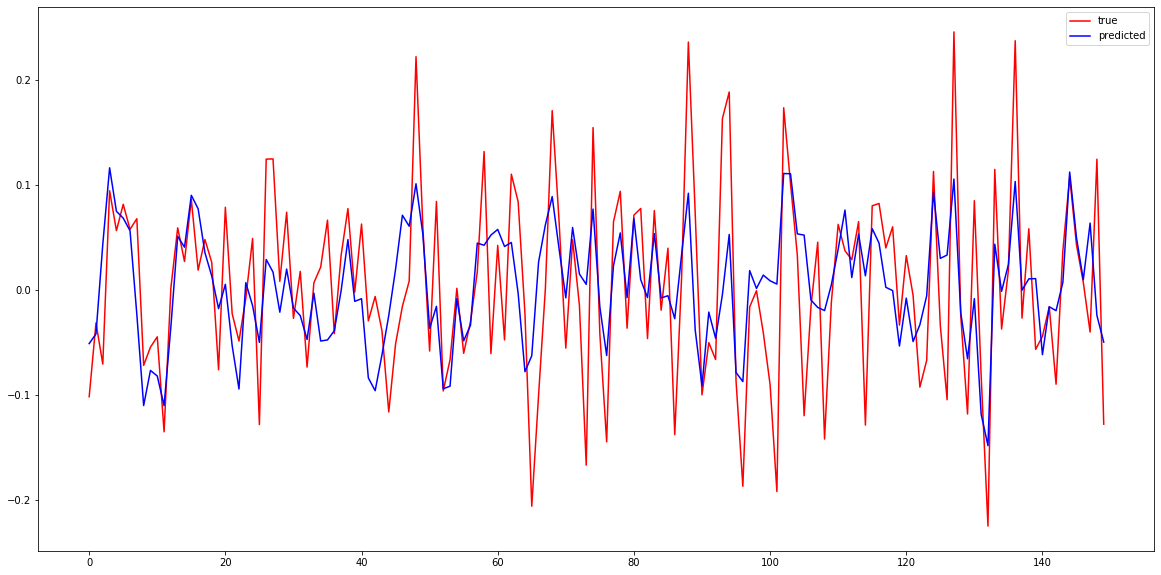

In [17]:

train_loader, val_loader = get_data_loaders(4096,1024)# put your data loader here, play with batch size to satisfy cuda

optimizer = torch.optim.Adam(rnn.parameters(),lr = 0.02)
loss_function = nn.MSELoss() # your loss function, use MSELoss for LSTM
# 设置GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# releasing unceseccary memory in GPU
if torch.cuda.is_available():
    torch.cuda.empty_cache()
rnn.cuda()

os.environ['CUDA_VISIBLE_DEVICES']='0'

start_ts = time.time()
losses = []
epochs = 3
# loop for every epoch (training + evaluation)
losses.append([]) # training losses
losses.append([]) # validation losses

batches = len(train_loader)
val_batches = len(val_loader)

# loop for every epoch (training + evaluation)
for epoch in range(epochs):
    total_loss = 0

    # progress bar
    progress = tqdm(enumerate(train_loader), desc="Loss: ", total=batches)

    # ----------------- TRAINING  -------------------- 
    # set model to training
    rnn.train()
    for i, data in progress:
        X, y = Variable(data[0]).type(torch.FloatTensor).to(device), Variable(data[1]).type(torch.FloatTensor).to(device)
        # training step for single batch
        rnn.zero_grad()
        outputs = rnn(X)
        loss = loss_function(outputs, y)
        loss.backward()
        optimizer.step()
        losses[0].append(total_loss/(i+1)) # for plotting learning curve

        # getting training quality data
        current_loss = loss.item()
        total_loss += current_loss

        # updating progress bar
        progress.set_description("Loss: {:.4f}".format(total_loss/(i+1)))

    # releasing unceseccary memory in GPU
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    # ----------------- VALIDATION  ----------------- 
    val_losses = 0
    precision, recall, f1, accuracy = [], [], [], []
    true_y, pred_y = [], []
    # set model to evaluating (testing)
    rnn.eval()
    with torch.no_grad():
        for i, data in enumerate(val_loader):
            X, y = Variable(data[0]).type(torch.FloatTensor).to(device), Variable(data[1]).type(torch.FloatTensor).to(device)
            # Get's the prediction (outputs) from the network
            outputs = rnn(X)
            losses[1].append(val_losses/(i+1)) # for plotting learning curve

            val_losses += loss_function(outputs, y)

            true_y.extend(y.cpu())
            pred_y.extend(outputs.cpu())

        print(f"Epoch {epoch+1}/{epochs}, training loss: {total_loss/batches}, validation loss: {val_losses/val_batches}")
plt.plot(true_y[-150:] , 'r', label="true")
plt.plot(pred_y[-150:] , 'b', label="predicted")
plt.legend(loc="upper right")
print(f"Training time: {time.time()-start_ts}s")